In [1]:
from GSMMutils.dynamic.rhs import get_bounds
import numpy as np
import scipy
import matplotlib.pyplot as plt

Chlorophyll

In [2]:
def get_parameters(x_storage_init, Tmax):
    T = 1/(1-x_storage_init)
    z = (T-1)/(Tmax-1)
    parameters = {
        "maximum_starch_production": 0.00128,
        "z": z
    }
    return parameters

expression = get_bounds("starch_production", get_parameters(0.2194, 1.92503))
expression

0.000891078252722407

In [3]:
param_range = [e/100 for e in np.linspace(0, 60, 100)]
res = {}
parameters = get_parameters(0.2194, 1.92503)
for param in param_range:
    temp_parameters = get_parameters(param, 1.92503)
    expression = get_bounds("starch_production", temp_parameters)
    res[float(param)] = float(round(expression,5))
res

{0.0: 0.001280069351196289,
 0.006060606060606061: 0.0012700557708740234,
 0.012121212121212121: 0.0012600421905517578,
 0.018181818181818184: 0.0012500286102294922,
 0.024242424242424242: 0.0012500286102294922,
 0.030303030303030304: 0.0012400150299072266,
 0.03636363636363637: 0.001230001449584961,
 0.04242424242424242: 0.0012199878692626953,
 0.048484848484848485: 0.0012099742889404297,
 0.05454545454545455: 0.001199960708618164,
 0.06060606060606061: 0.0011899471282958984,
 0.06666666666666667: 0.0011799335479736328,
 0.07272727272727274: 0.0011699199676513672,
 0.0787878787878788: 0.0011599063873291016,
 0.08484848484848484: 0.001149892807006836,
 0.09090909090909091: 0.0011401176452636719,
 0.09696969696969697: 0.0011301040649414062,
 0.10303030303030303: 0.0011200904846191406,
 0.1090909090909091: 0.001110076904296875,
 0.11515151515151516: 0.0011000633239746094,
 0.12121212121212122: 0.0010900497436523438,
 0.1272727272727273: 0.0010800361633300781,
 0.13333333333333333: 0.0010

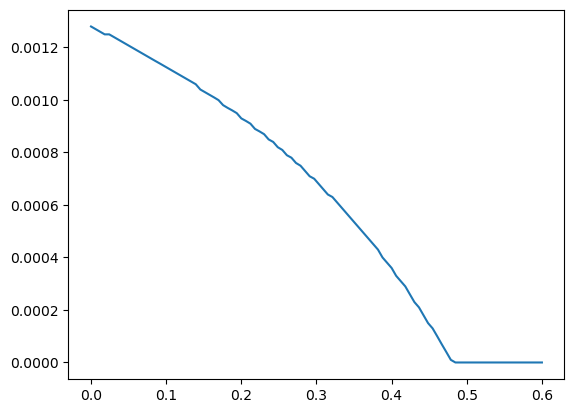

In [4]:
fig, ax = plt.subplots()
ax.plot(list(res.keys()), list(res.values()))
# ax.hlines(y=0, xmin=0, xmax=0.11, linewidth=2, color='r')

In [1]:
from GSMMutils import DATA_PATH
from GSMMutils.dynamic.sensitivity_analysis import SensitivityAnalysis
from GSMMutils.experimental.ExpMatrix import ExpMatrix
from GSMMutils.graphics.plot import lineplot
matrix = ExpMatrix(f"{DATA_PATH}/experimental/Matriz- DCCR Dunaliella salina_dfba.xlsx", conditions = "Resume")
analysis = SensitivityAnalysis(matrix)
analysis.load_parameters(f"{DATA_PATH}/dfba/inputs/initial_parameters.json")

In [3]:
analysis.parameters['Ex'].value

665.203837825476

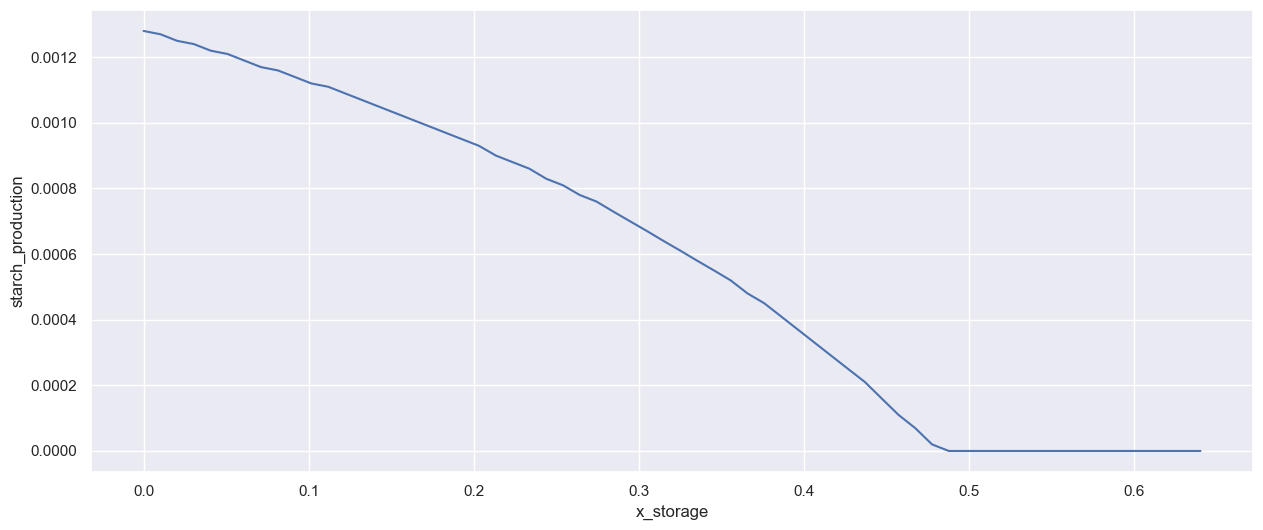

<Axes: xlabel='x_storage', ylabel='starch_production'>

In [6]:
res = analysis.evaluate_dynamic_expression("starch_production", "x_storage")
lineplot(list(res.keys()), list(res.values()), xlabel="x_storage", ylabel="starch_production")

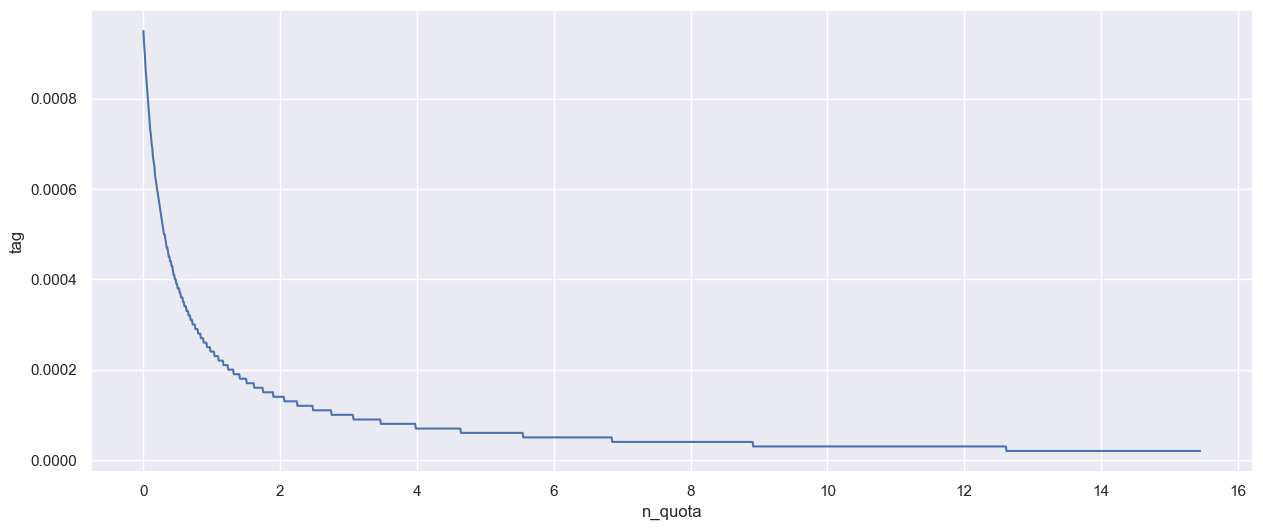

<Axes: xlabel='n_quota', ylabel='tag'>

In [7]:
res = analysis.evaluate_dynamic_expression("tag", "n_quota")
lineplot(list(res.keys()), list(res.values()), xlabel="n_quota", ylabel="tag")

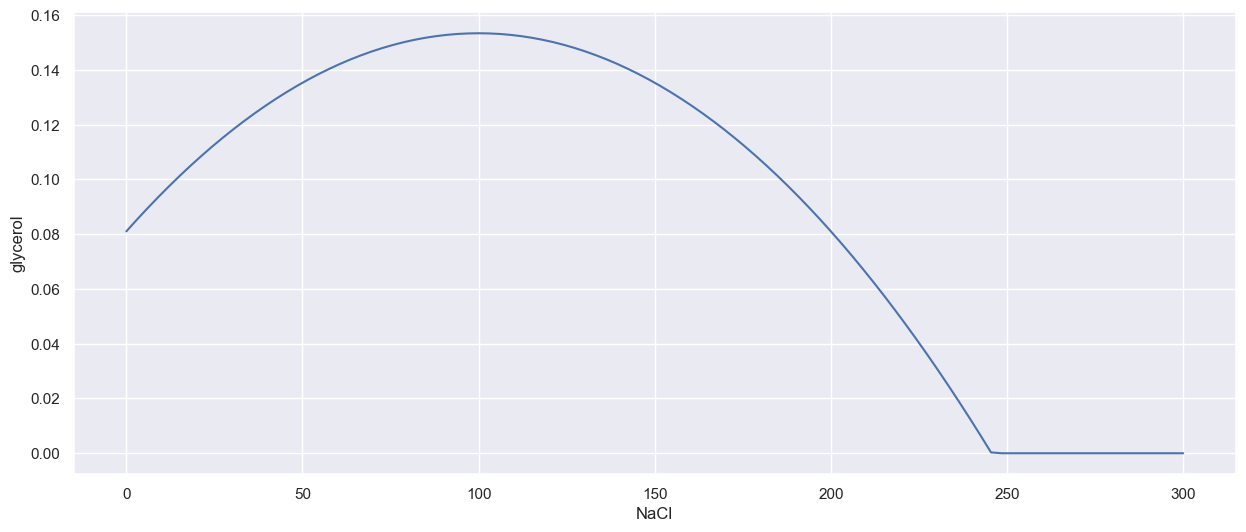

<Axes: xlabel='NaCl', ylabel='glycerol'>

In [2]:
res = analysis.evaluate_dynamic_expression("glycerol", "nacl", param_range= [0, 300, 1])
lineplot(list(res.keys()), list(res.values()), xlabel="NaCl", ylabel="glycerol")

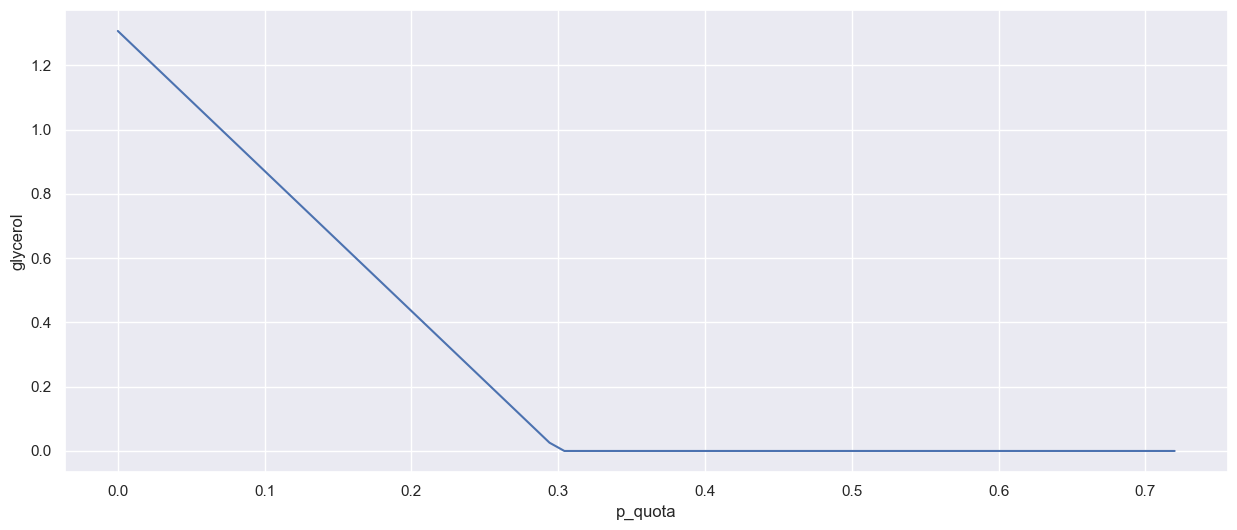

<Axes: xlabel='p_quota', ylabel='glycerol'>

In [3]:
res = analysis.evaluate_dynamic_expression("glycerol", "p_quota")
lineplot(list(res.keys()), list(res.values()), xlabel="p_quota", ylabel="glycerol")

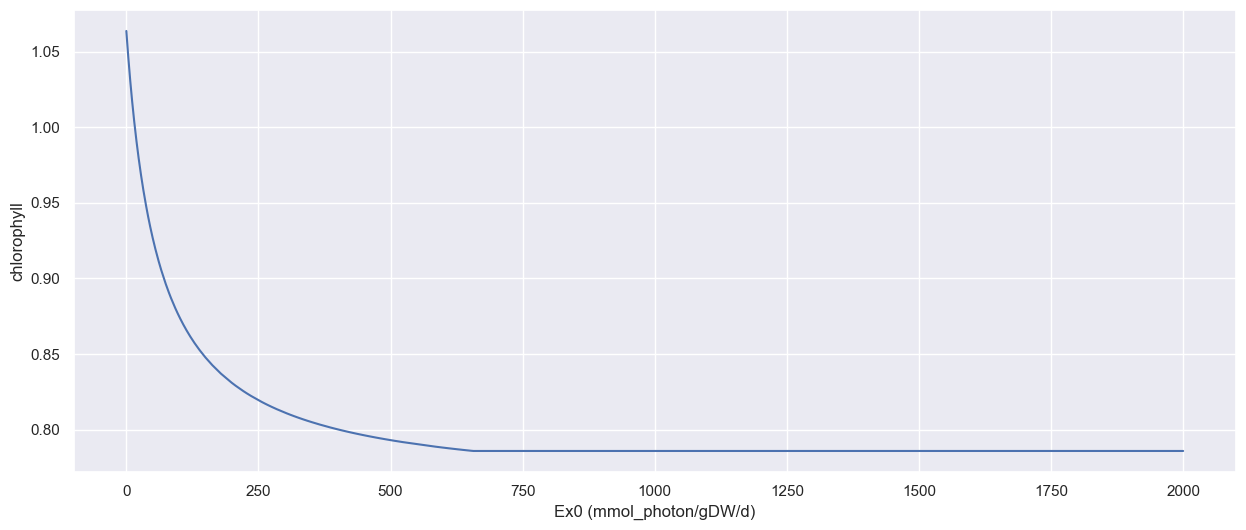

<Axes: xlabel='Ex0 (mmol_photon/gDW/d)', ylabel='chlorophyll'>

In [4]:
analysis.load_parameters(f"{DATA_PATH}/dfba/inputs/initial_parameters.json")
res = analysis.evaluate_dynamic_expression("chlorophyll", "Ex0", param_range = [0, 2000, 100])
lineplot(list(res.keys()), list(res.values()), xlabel="Ex0 (mmol_photon/gDW/d)", ylabel="chlorophyll")

C:\Users\Bisbii\PythonProjects\GSMMutils\src\GSMMutils\dynamic\rhs.py:73: RuntimeWarning: divide by zero encountered in double_scalars
  return yE - ratio + parameters["chlorophyll"] / parameters["phosphate_mass_quota"]


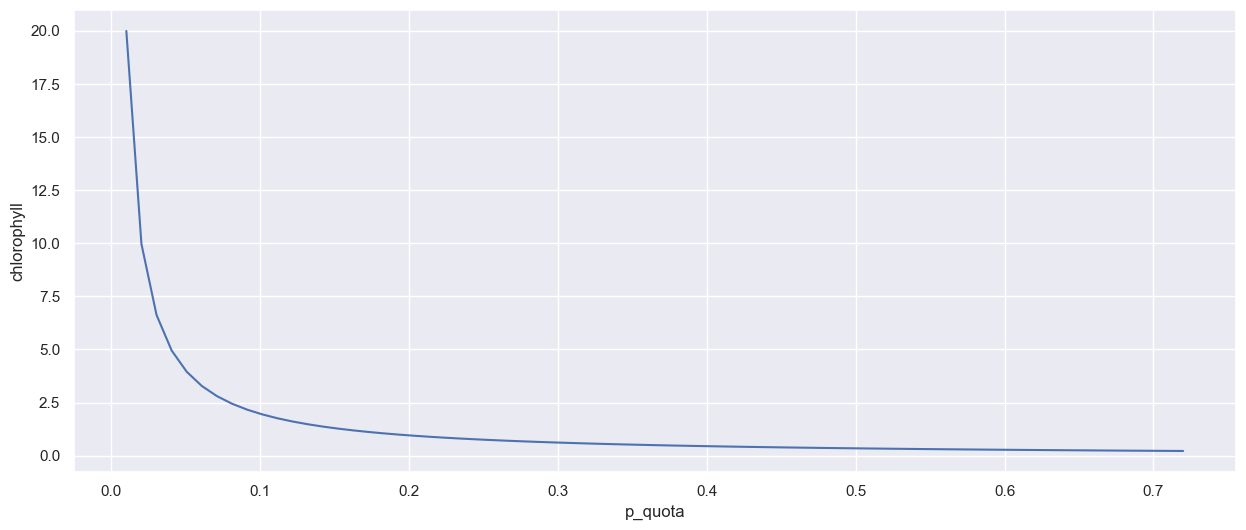

<Axes: xlabel='p_quota', ylabel='chlorophyll'>

In [5]:
res = analysis.evaluate_dynamic_expression("chlorophyll", "p_quota")
lineplot(list(res.keys()), list(res.values()), xlabel="p_quota", ylabel="chlorophyll")

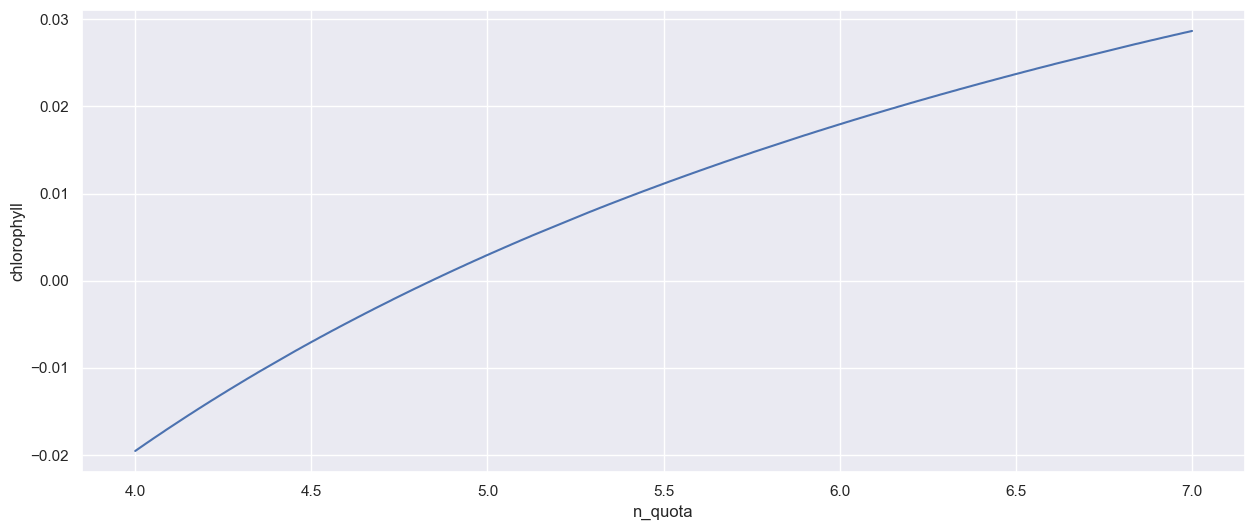

In [10]:
res = analysis.evaluate_dynamic_expression("chlorophyll", "n_quota", param_range = [4, 7, 10])
graph  = lineplot(list(res.keys()), list(res.values()), to_show=False, xlabel="n_quota", ylabel="chlorophyll")

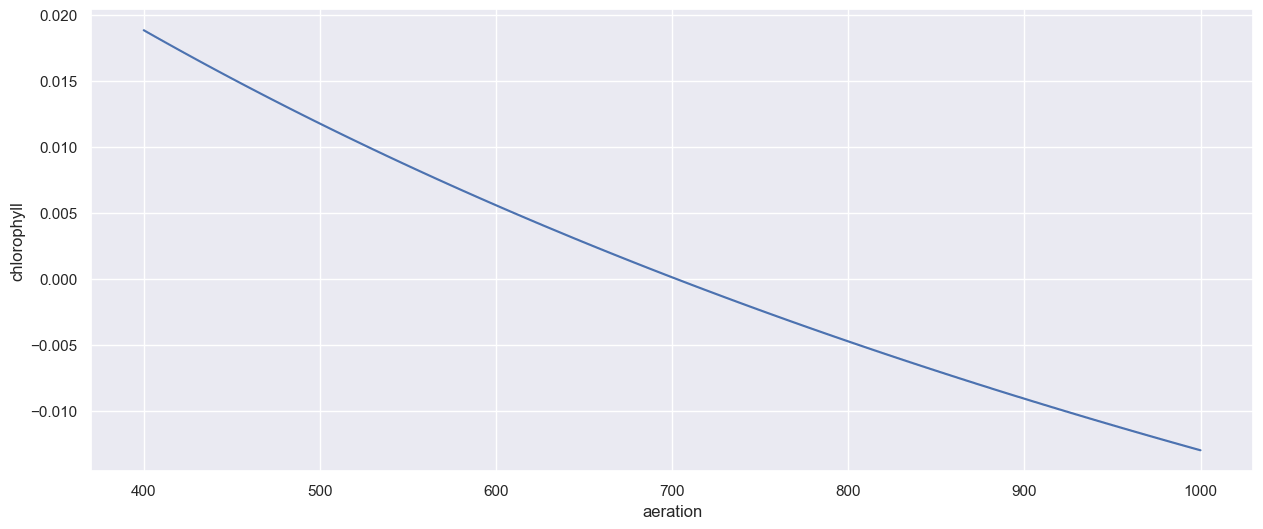

In [12]:
res = analysis.evaluate_dynamic_expression("chlorophyll", "aeration", param_range = [400, 1000, 50])
graph  = lineplot(list(res.keys()), list(res.values()), to_show=False, xlabel="aeration", ylabel="chlorophyll")